In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Regularisation

Regularization is a technique used in machine learning to prevent overfitting by adding a penalty to the model's complexity during training. It helps the model generalize better to unseen data by discouraging extreme parameter values.

![Regularisation|650](https://editor.analyticsvidhya.com/uploads/83837impact%20of%20req.png)

## Intuition

Regularization intuitively balances a model's complexity with its ability to generalize. Imagine fitting a curve to scattered data points; an overly complex curve might fit the training points perfectly but fail to represent the underlying pattern, akin to memorizing noise rather than learning the signal. Regularization nudges the model towards simpler solutions by penalizing extreme parameter values, promoting smoother curves that capture the true trend. This encourages the model to focus on essential features, reducing overfitting and enhancing its capacity to make accurate predictions on new, unseen data. In essence, regularization guides the model to learn the underlying structure rather than the noise, leading to more robust and reliable performance.

## Types of Regularisation

1. Ridge Regularisation (L2)
2. Lasso Regularisation (L1)
3. Elastic Net Regularisation 

[Ridge vs Lasso Regression, Visualized!!!](https://youtu.be/Xm2C_gTAl8c?si=ElA4bXy6fozlKwq4)

![Difference](https://miro.medium.com/v2/resize:fit:1400/1*Ri5Jj6mFqeHpeJXiFnwUgA.png)

### Ridge Regression

It involves adding a penalty term proportional to the square of the coefficients. This tends to shrink the coefficients towards zero without forcing them to be exactly zero.

[Regularization Part 1: Ridge (L2) Regression](https://youtu.be/Q81RR3yKn30?si=lQBgIjYjOsI2NRnz)

$$\text{Ordinary Least Squares Approach: } \ \ \ \ \  \beta = (X^T X + \lambda I)^{-1} \cdot X^T Y $$

$$\text{Cost Function: } \ \ \ \ \ J(\beta) = \frac{1}{n} \bigg ( \sum_{i=1}^n (\hat{y_i} - y_i)^2 + \lambda \sum_{i=1}^{n} \beta_i^2 \bigg )$$

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

X = data.data
y = data.target

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2002)

In [4]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.49731505640194407

In [5]:
from sklearn.linear_model import Ridge
rg = Ridge(alpha=0.1)

rg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [6]:
rg.score(X_test,y_test)

0.5197781828280434

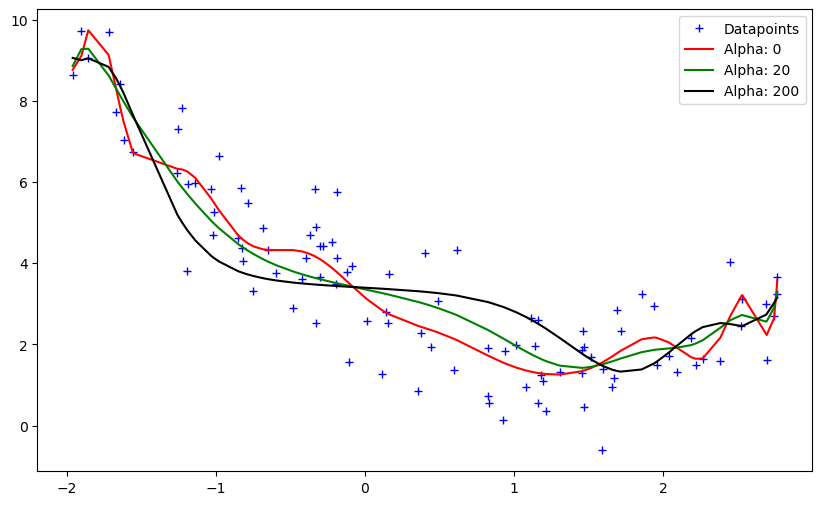

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'k']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

#### Own Implementation: OLS Approach

In [8]:
class CRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
    

In [9]:
rg = CRidge()
rg.fit(X_train,y_train)

y_pred = rg.predict(X_test)

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5197781828280436

#### Own Implementation: Gradient Descent Approach

In [11]:
class CRidgeGD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_
    

In [12]:
rg = CRidgeGD(epochs=500,learning_rate=0.001,alpha=0.005)
rg.fit(X_train,y_train)

y_pred = rg.predict(X_test)

In [13]:
r2_score(y_test,y_pred)

0.4091105348792341

#### `scikit-learn` Implementation

In [14]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.5,learning_rate='constant',alpha=0.0001)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.48982735863413784

#### Consequences of Ridge Regression

- Parameters tend to 0 as we increase alpha
- High value parameters are effected more
- Bias increases and variance decreases as we increase alpha
- Loss function graph narrows and moves towards 0

### Lasso Regression

It involves adding a penalty term proportional to the absolute value of the coefficients. This encourages sparsity in the model, meaning it prefers fewer non-zero coefficients.

[Regularization Part 2: Lasso (L1) Regression](https://youtu.be/NGf0voTMlcs?si=MkYZP4-GtezW8QNf)

$$\text{Cost Function: } \ \ \ \ \ J(\beta) = \frac{1}{n} \bigg ( \sum_{i=1}^n (\hat{y_i} - y_i)^2 + \lambda \sum_{i=1}^{n} |\beta_i| \bigg )$$

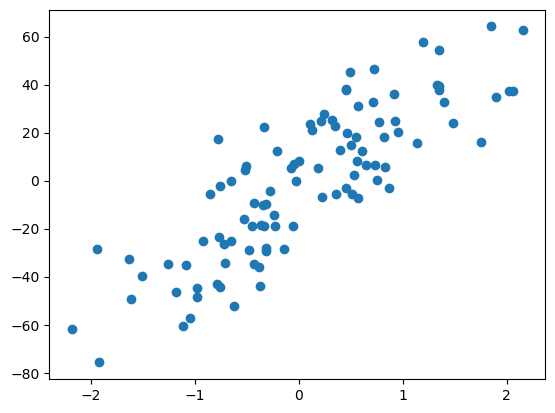

In [22]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y);

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7282261781175683

In [25]:
from sklearn.linear_model import Lasso
L = Lasso()
L.fit(X_train,y_train)

L.score(X_test,y_test)

0.715962247715901

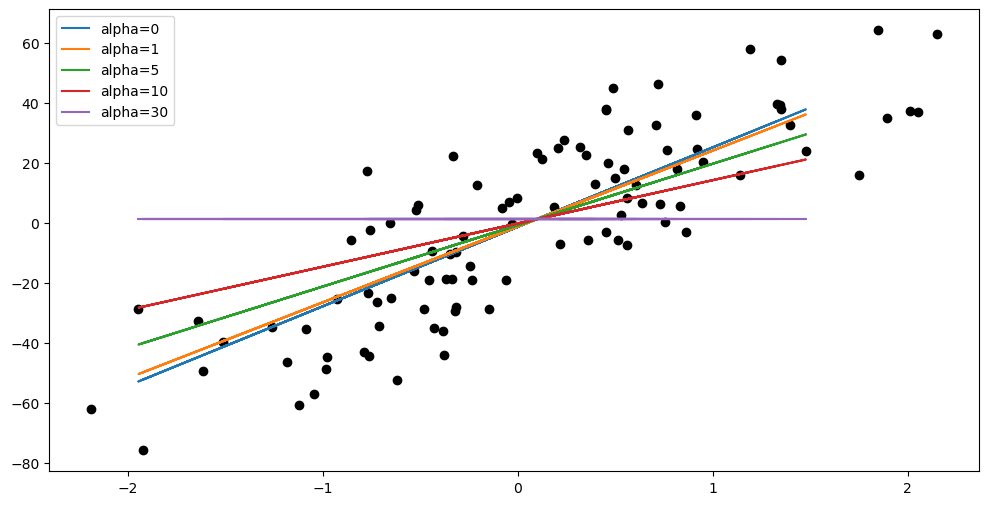

In [26]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y,c='k')
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))

plt.legend()
plt.show()

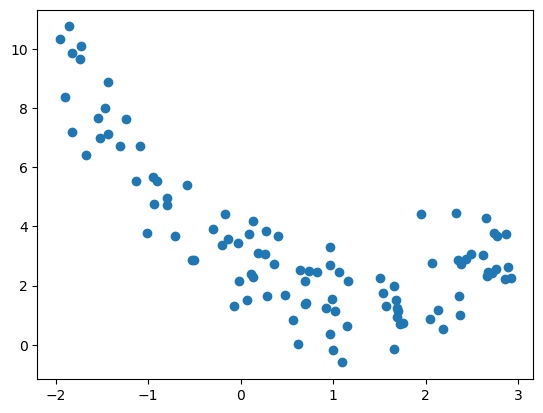

In [27]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

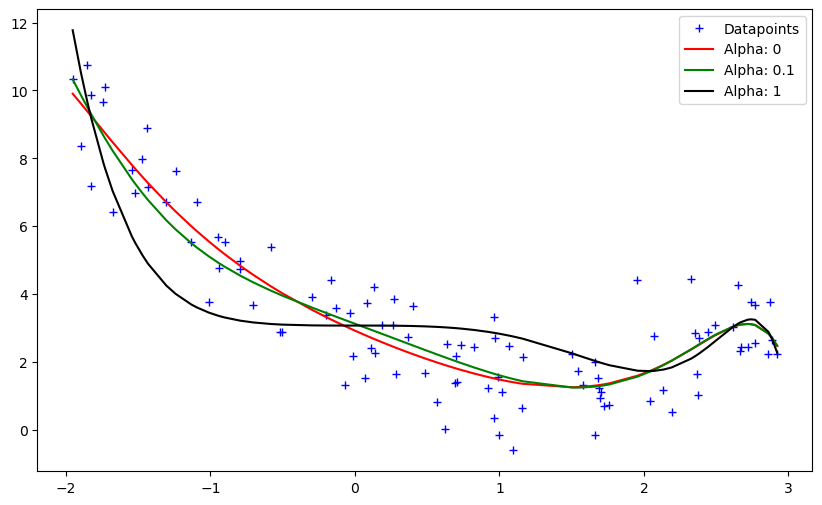

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'k']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

#### Consequences of Lasso Regression

- Parameters become 0 as we increase alpha resulting in feature selection
- High value parameters are effected more
- Bias increases and variance decreases as we increase alpha
- Loss function graph narrows from the left, moves towards 0 and even becomes 0

#### Why does Lasso Regression introduce sparsity?

It introduces sparsity because in the case of Lasso, $\lambda$ is present in numerator which compensates it and drives it to 0. This is not the case in Ridge because there $\lambda$ is present in denominator and no value of it can cause it to become 0.

### Elastic Net Regression

It combines both L1 and L2 penalties. It offers a balance between feature selection (like Lasso) and regularization (like Ridge).

[Regularization Part 3: Elastic Net Regression](https://youtu.be/1dKRdX9bfIo?si=ZEP1emJhc31NwfwI)

$$\text{Cost Function: } \ \ \ \ \ J(\beta) = \frac{1}{n} \bigg ( \sum_{i=1}^n (\hat{y_i} - y_i)^2 + \lambda \sum_{i=1}^{n} \beta_i^2 + \lambda \sum_{i=1}^{n} |\beta_i| \bigg )$$

In [29]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)

reg.score(X_test,y_test)

0.7282261781175683

In [30]:
# Ridge 
reg = Ridge(alpha=5.5)
reg.fit(X_train,y_train)

reg.score(X_test,y_test)

0.7063176203322165

In [31]:
# Lasso
reg = Lasso(alpha=1.6)
reg.fit(X_train,y_train)

reg.score(X_test,y_test)

0.7075122658491467

In [32]:
# ElasticNet
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)

reg.score(X_test,y_test)

0.7280286199582425